In [1]:
import pandas as pd
import servicex as sx
import awkward as ak
from func_adl_servicex import ServiceXSourceUpROOT
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200 # make figures bigger and more readable

In [2]:
dataset_name = "cms:DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/RunIIAutumn18NanoAODv7-Nano02Apr2020_102X_upgrade2018_realistic_v21_ext2-v1/NANOAODSIM"
sx_dataset = sx.ServiceXDataset(dataset_name, "uproot")
ds = ServiceXSourceUpROOT(sx_dataset, "Events")
filtered_missing_ET_4 = ds.Where(lambda event: event.Jet_pt.Where(lambda pT: pT > 40).Count() >= 2)\
                          .Select(lambda event: event.MET_pt).AsAwkwardArray().value()

In [3]:
filtered_missing_ET_4

<Array [46.6, 32.9, 45.7, ... 23.2, 98.6, 43.3] type='71715250 * float32'>

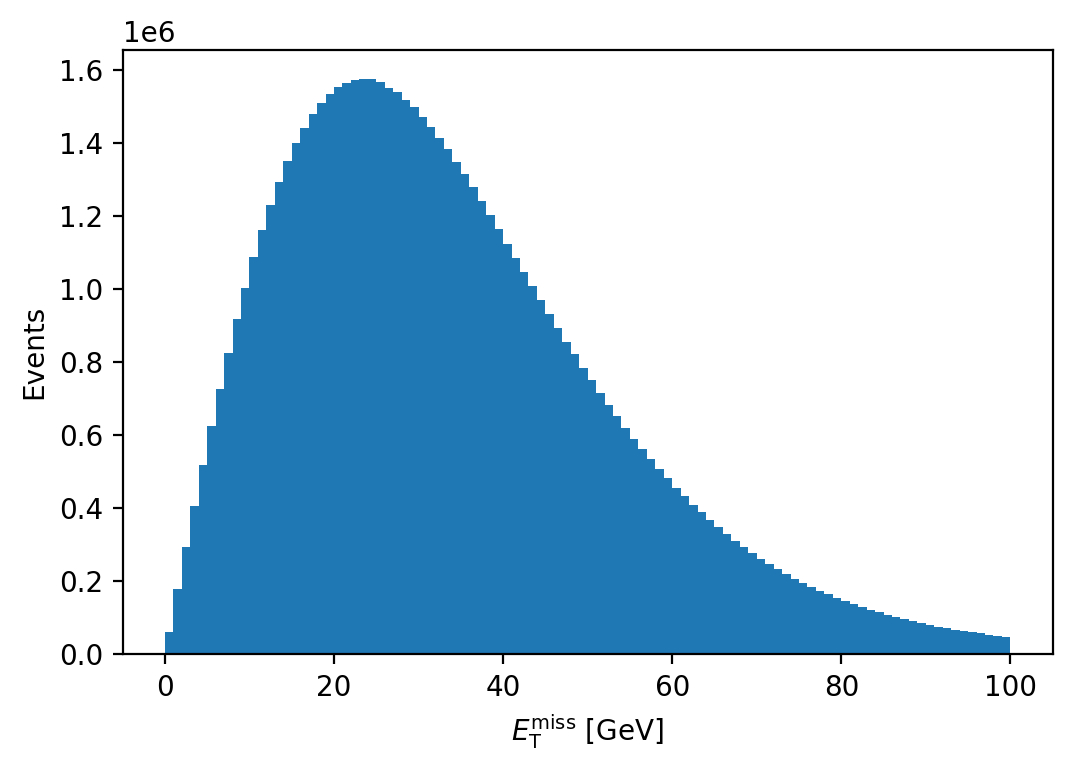

In [4]:
plt.hist([filtered_missing_ET_4], bins=100, range=(0, 100))
plt.xlabel(r'$E_\mathrm{T}^\mathrm{miss}$ [GeV]')
plt.ylabel('Events')
plt.show()